In [ ]:
import numpy as np
import math
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import sympy as sp
import time
import pandas as pd


In [ ]:

def bisekcja(a,b,ex= 1e-5,maxi=100):

    def f(x):
        # Funkcja, której zer szukamy
        # Możesz zmienić funkcję odkomentowując jedną z opcji poniżej
        return x**2 - 1/11
        # return x**3 + x**2 - 5*x - 2
        # return 2*x - 3
        # return x**2 - 4
        # return np.sin(x)

    # Obliczamy wartości funkcji w punktach końcowych przedziału [a,b]
    fa = f(a)
    fb = f(b)

    # Sprawdzamy, czy wartości funkcji mają różne znaki na końcach przedziału ( czy funkcja przechodzi przez 0)
    if fa * fb > 0:
        raise ValueError("Funkcja ma takie same znaki na końcach przedziału.")

    results = []  # Inicjalizacja listy wyników
    iteration_names = []  # Lista nazw iteracji


    for i in range(maxi):

        # Wyznaczenie środka przedziału
        c = (a + b) / 2

        # Wartość funkcji w punkcie
        fc = f(c)

        # Rysowanie wykresu dla każdej iteracji
        x = np.linspace(a - 2, b + 2, 100)
        y = f(x)

        clear_output(wait=True)  # Czyścimy poprzedni wykres

        fig, ax = plt.subplots()
        ax.plot(x, y)
        ax.axhline(y=0, color='black', linestyle='--')
        ax.axvline(x=b, color='red', linestyle='--')
        ax.axvline(x=a, color='red', linestyle='--')
        ax.axvline(x=c, color='blue', linestyle='--')
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.set_title('Iteracja {}'.format(i + 1))

        # Dodanie obszaru tekstowego na wykresie
        info_text = "Środek przedziału: {:.7f}".format(c,)
        ax.text(0.02, 0.90, info_text, transform=ax.transAxes, fontsize=11, verticalalignment='top')

        plt.show()

        iteration_name = "Iteracja " + str(i)
        iteration_names.append(iteration_name)


        # Sprawdzamy, czy wartość bezwzględna wartości funkcji w punkcie środkowym jest mniejsza od tolerancji
        if abs(fc) < ex:
            results.append(c)
            print("znaleziony pierwiastek:",c)
            break
            #return c
        # Sprawdzamy, czy wartości funkcji w punkcie środkowym i w punkcie a mają różne znaki
        if fa * fc < 0:
            b = c
            fb = fc
        # W przeciwnym wypadku wartości funkcji w punktach c i b mają różne znaki
        else:
            a = c
            fa = fc
        
        results.append(c)

        time.sleep(1)  # Opóźnienie wynoszące 1 sekundę (czas między pojawianiem się kolejnych iteracji)

    # Wyświetlenie wyników w tabelce na końcu
    df = pd.DataFrame(results, columns=['Pierwiastek'], index = iteration_names)
    display(df)

# Dodanie suwaków
a_slider = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='a:')
b_slider = widgets.FloatSlider(value=10, min=-10, max=10, step=0.1, description='b:')
display(a_slider, b_slider)

iteration = 0

# Wywoływanie obliczenia po wciśnięciu prycisku
def next_iteration(sender):
    global iteration
    iteration += 1
    if iteration <= 100:  # Maksymalna liczba iteracji i brak pauzy
        bisekcja(a_slider.value, b_slider.value)  # Wywołujemy bisekcję, aby zaktualizować wykres
    else:
        print("Osiągnięto maksymalną liczbę iteracji")

# Utworzenie przycisku
oblicz = widgets.Button(description="Oblicz pierwiastek")
oblicz.on_click(next_iteration)

display(oblicz)

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

# Przykładowa funkcja
def funtion(x):
        # Funkcja, której zer szukamy
        # Możesz zmienić funkcję odkomentowując jedną z opcji poniżej
        return x**2 - 1/11
        # return x**3 + x**2 - 5*x - 2
        # return 2*x - 3
        # return x**2 - 4
        # return np.sin(x)


def newton_method(f, x0, ex=1e-6, max_iter=100):
    """
    Oblicza pierwiastek funkcji f przy użyciu metody Newtona.

    :param f: Funkcja, dla której obliczamy pierwiastek.
    :param x0: Początkowe przybliżenie pierwiastka.
    :param tol: Tolerancja błędu, domyślnie 1e-6.
    :param max_iter: Maksymalna liczba iteracji, domyślnie 100.
    :return: Pierwiastek funkcji f lub None, jeśli nie udało się znaleźć pierwiastka.
    """

    x = x0
    iteration = 0

    # Przybliżona pochodna numeryczna
    def numerical_derivative(func, x, h=1e-6):
        return (func(x + h) - func(x - h)) / (2 * h)

    # Inicjalizacja listy wyników
    results = []
    iteration_names = []

    # Wykres
    x_vals = np.linspace(x0 - 10, x0 + 10, 400)
    y_vals = f(x_vals)

    plt.plot(x_vals, y_vals, label="Funkcja")

    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    while iteration < max_iter:
        x_new = x - f(x) / numerical_derivative(f, x)

        # Rysowanie stycznej
        tangent_line = f(x) + numerical_derivative(f, x) * (x_vals - x)
        plt.plot(x_vals, tangent_line, '--', label=f"Styczna {iteration + 1}")

        # Dodawanie wyników do list
        results.append(x_new)
        iteration_names.append(f"Iteracja {iteration + 1}")

        # Sprawdź warunek stopu
        if abs(x_new - x) < ex:
            plt.scatter(x_new, f(x_new), color='red', marker='o', label="Pierwiastek")
            plt.legend()
            plt.title(f'Metoda Newtona - Iteracja {iteration + 1}')
            plt.ylim([-1, 3])  # Ograniczenie osi Y
            plt.xlim([-2, 2])  # Ograniczenie osi Y
            plt.show()

            # Zwróć wyniki iteracji
            df = pd.DataFrame(results, columns=['Pierwiastek'], index=iteration_names)
            display(df)
            return results, iteration_names

        x = x_new
        iteration += 1

    # Zwróć None, jeśli nie udało się znaleźć pierwiastka w maksymalnej liczbie iteracji
    return None

def update_values(b):
    x = x_slider.value
    result = newton_method(funtion, x)

    # Obsługa błędu
    if result is None:
        print("Nie udało się znaleźć pierwiastka w maksymalnej liczbie iteracji.")


# Tworzenie suwaków i przycisku w interfejsie użytkownika
x_slider = widgets.FloatSlider(value=2, min=-10, max=10, step=0.1, description='x')
oblicz = widgets.Button(description='Oblicz')

# Podpięcie funkcji do przycisku "Oblicz"
oblicz.on_click(update_values)

# Wyświetlenie interfejsu użytkownika
display(x_slider, oblicz)

FloatSlider(value=3.0, description='a', max=10.0, min=-10.0)

FloatSlider(value=0.0, description='b', max=10.0, min=-10.0)

IntSlider(value=1, description='n', max=20, min=1)

Button(description='Oblicz', style=ButtonStyle())

,pierwiastek
Iteracja 1,0.285714


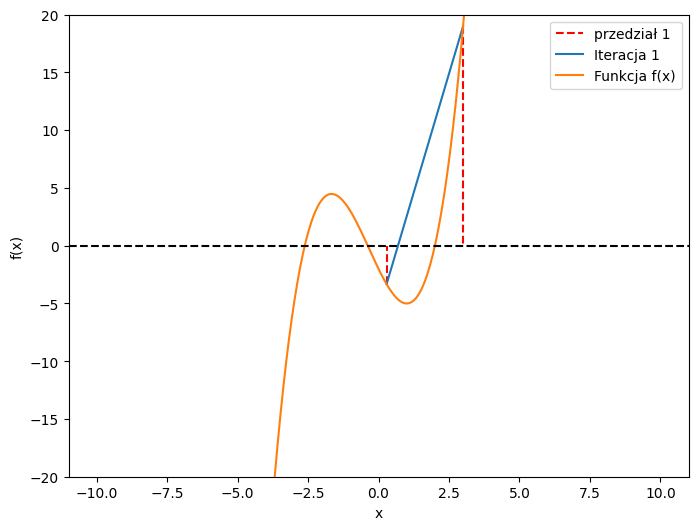

Rozwiązanie: 0.28571


,pierwiastek
Iteracja 1,0.285714
Iteracja 2,0.689826
Iteracja 3,1.143655
Iteracja 4,1.525139
Iteracja 5,1.768361


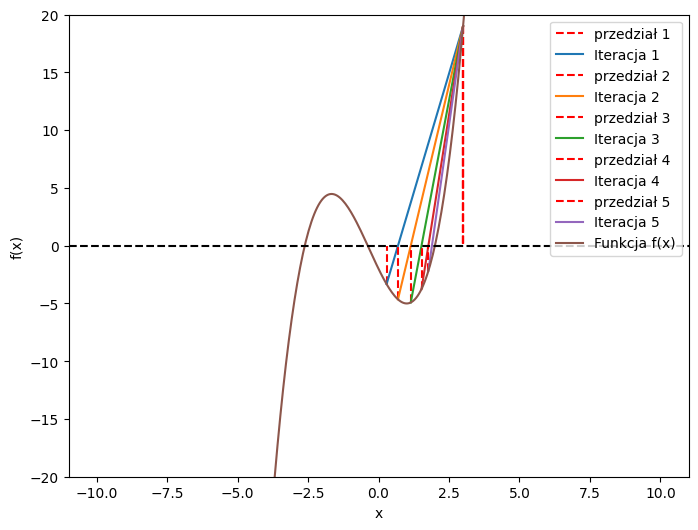

Rozwiązanie: 1.76836


,pierwiastek
Iteracja 1,0.285714


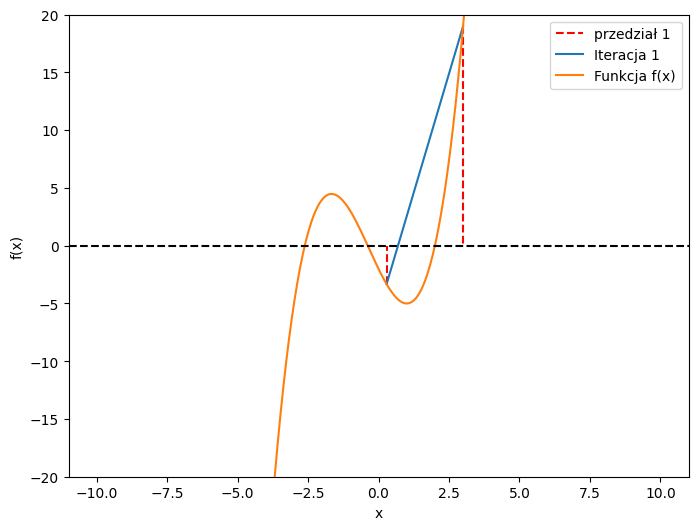

Rozwiązanie: 0.28571


,pierwiastek
Iteracja 1,0.285714
Iteracja 2,0.689826
Iteracja 3,1.143655
Iteracja 4,1.525139


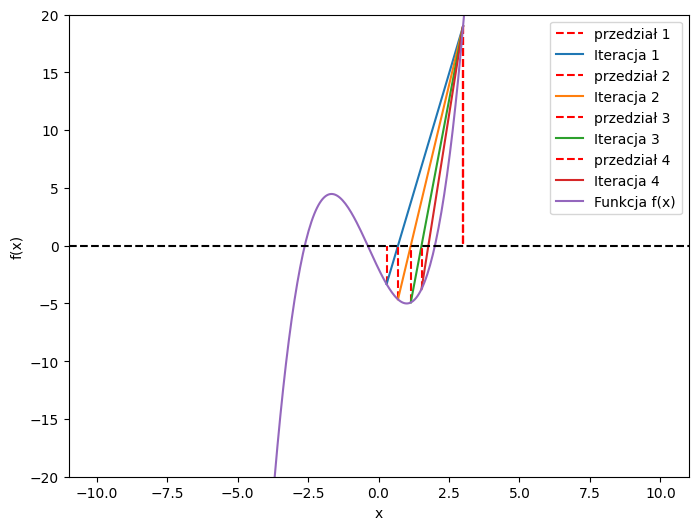

Rozwiązanie: 1.52514


,pierwiastek
Iteracja 1,0.285714
Iteracja 2,0.689826
Iteracja 3,1.143655
Iteracja 4,1.525139
Iteracja 5,1.768361
Iteracja 6,1.895384
Iteracja 7,1.954551


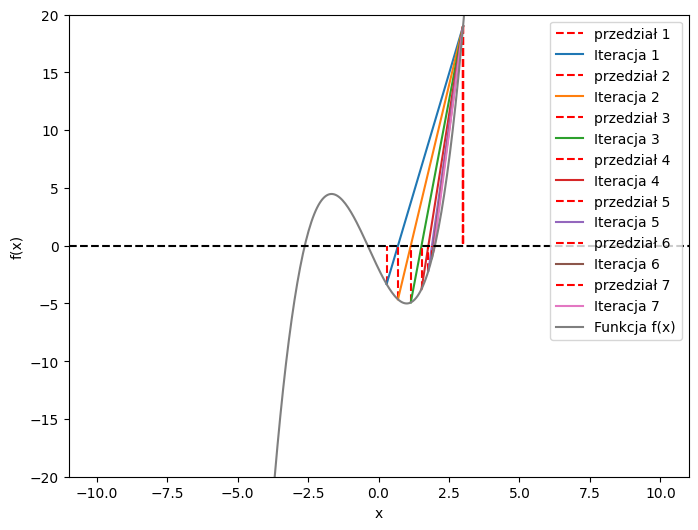

Rozwiązanie: 1.95455


,pierwiastek
Iteracja 1,0.285714
Iteracja 2,0.689826
Iteracja 3,1.143655


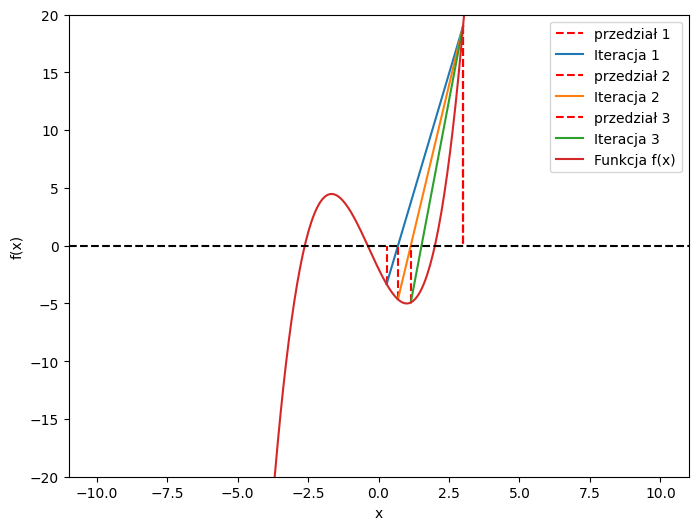

Rozwiązanie: 1.14365


In [16]:
def Sieczne(a, b, n):
    def f(x):
        # Funkcja, której zer szukamy
        # Możesz zmienić funkcję odkomentowując jedną z opcji poniżej
        # return x**2 - 1/11
        return x**3 + x**2 - 5*x - 2
        # return 2*x - 3
        # return x**2 - 4
        # return np.sin(x)

    if f(a) * f(b) >= 0:
        print("Niepowodzenie: funkcja nie spełnia warunku f(a) * f(b) < 0")
        return None

    a_n = a
    b_n = b

    x_vals = np.linspace(-10, 10, 400)
    y_vals = f(x_vals)

    results = []  # Inicjalizacja listy wyników
    iteration_names = []  # Lista nazw iteracji

    for i in range(1, n+1):
        # Obliczenie wartości x_m dla i-tej iteracji
        m_n = a_n - f(a_n) * (b_n - a_n) / (f(b_n) - f(a_n))
    
        # Obliczenie wartości funkcji w punkcie x_m
        f_m_n = f(m_n)

        if f(a_n) * f_m_n < 0:
            # Przypadek 1: Wybierz punkt a_n i punkt x_m jako nowy przedział
            a_n = a_n
            b_n = m_n
        elif f(b_n) * f_m_n < 0:
            # Przypadek 2: Wybierz punkt x_m i punkt b_n jako nowy przedział
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            # Przypadek 3: Znaleziono dokładne rozwiązanie
            print("Znaleziono rozwiązanie")
            return m_n
        else:
            # Przypadek 4: Nie znaleziono rozwiązania
            print("Nie znaleziono rozwiązania")
            return None

        # Obliczenie wartości x_m dla i-tej iteracji
        iteration_name = "Iteracja " + str(i)
        iteration_names.append(iteration_name)

        results.append((m_n,))

        # Dodawanie pionowej linii łączącej punkty a i b z wykresem funkcji
        plt.plot([a_n, a_n], [f(a_n), 0], 'r--', label=f'przedział {i}')
        plt.plot([b_n, b_n], [f(b_n), 0], 'r--')

        # Dodawanie linii prostej łączącej punkty styku linii pionowych z wykresem funkcji
        x_vals_iter = np.linspace(a_n, b_n, 400)
        y_vals_iter = f(a_n) + (f(b_n) - f(a_n)) / (b_n - a_n) * (x_vals_iter - a_n)
        plt.plot(x_vals_iter, y_vals_iter, label=f'Iteracja {i}')

    df = pd.DataFrame(results, columns=["pierwiastek"], index=iteration_names)
    display(df)

    plt.plot(x_vals, y_vals, label='Funkcja f(x)')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.ylim(-20, 20)  # Ograniczenie wartości osi Y
    plt.legend()
    plt.show()

    return m_n

# Tworzenie suwaków i przycisku w interfejsie użytkownika
a_slider = widgets.FloatSlider(value=3, min=-10, max=10, step=0.1, description='a')
b_slider = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='b')
n_slider = widgets.IntSlider(value=1, min=1, max=20, description='n')
oblicz = widgets.Button(description='Oblicz')

# Definiowanie funkcji obsługujących kliknięcie przycisku "Oblicz"
def update_values(b):
    a = a_slider.value
    b = b_slider.value
    n = n_slider.value
    plt.figure(figsize=(8, 6))
    result = Sieczne(a, b, n)  # Wywołanie funkcji Sieczne() z nowymi wartościami a, b, n
    if result is not None:
        print("Rozwiązanie:", round(result, 5))

# Przypisanie funkcji obsługującej kliknięcie przycisku "Oblicz" do przycisku
oblicz.on_click(update_values)

# Wyświetlenie suwaków i przycisku
display(a_slider, b_slider, n_slider, oblicz)
